

# Project: Investigate a Dataset - [TMDb_Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

For this Data Analysis Project. I will be using The Movie Database dataset(TMDb) which has about 10 000 entries and 21 columns.
It's columns are popularity, budget, revenue, cast, genre, production company and release date, etc.
I want to find out if budget or cast or popularity have correlations to high revenue movies and other interesting patterns
like if release date have correlation to high revenue movies and more.


### Question(s) for Analysis
1. Which movies have highest and lowest earns/profit.
2. Do movies with high budgets get high revenue.
3. Have movie earnings increased over the years.
4. Which movies have highest and lowest runtime.
5. Which genres have low and high movie release.
6. Are movies with more polpularity getting high earns. 
--------------------------------------------------------------------------
1. Average budget high earning movies.
2. Average revenue high earning movies.
3. Total release of movies by production company that got high earns.
4. Average runtime high earning movies.
5. Average genre in high earning movies.
6. Frequent cast in high earning movies.
--------------------------------------------------------------------------
#### Top 10 
1. Top 10 highest budget
2. Top 10 highest earning/profit

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use
#file imported to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

Looking at the data set and asking questions relevent to our data analysis process, We will keep relevent data and delete what is unused data.


### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
#Using a variable called "tmbd_data" to load data
pd.options.display.max_rows= 9999
tmdb_data = pd.read_csv('tmdb-movies.csv')
#print columns and rows of the db 
tmdb_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [15]:
tmdb_data.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [2]:
import pandas as pd

#look at more info about data in the table
tmdb_data.info()
#Look at datatypes in each column
print('{:30}{}'.format('column','type'))
columns = tmdb_data.columns
for column in columns:
    print('{:25}{}'.format(column, str(type(tmdb_data[column][0]))))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
#find total columns with null
import pandas as pd
tmdb_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#Now we fill them using 'fillna' function
tmdb_data.fillna(0)
print()

### Inspection of data set
1. Release date is a string data type not python datetime.
2. Unit of currency is not given.
3. Some budget and revenue entries have value 0.


### Data Cleaning
After inspecting the data we need to:

1. Find and remove duplicated columns.
2. Remove entries with zero budget and zero revenue in them. 
3. Find and replace release date format with the correct date format.
4. Remove columns not used in data analysis process.
5. Replace columns with null values with a zero. 
6. Zeros in runtime column replaced with NaN.
7. Change revenue and budget column format to int for calcualtions.

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


__1. Removing duplicated rows__

In [20]:
#count duplicates
sum(tmdb_data.duplicated())

1

In [22]:
#drop duplicates
tmdb_data.drop_duplicates(inplace = True)
#since there where 10 866 entries and 1 duplicate, after droping it the correct number is
print("(Rows,Columns) : ",tmdb_data.shape)

(Rows,Columns) :  (10865, 21)


__2. Removing entries with zero in budget and revenue__

In [24]:
#count rows containing a zero
print("Column budget:",tmdb_data[(tmdb_data['budget']==0)].shape[0])
print("Column revenue:",tmdb_data[(tmdb_data['revenue']==0)].shape[0])

Column budget: 5696
Column revenue: 6016


In [3]:
#replace zero with NaN and remove
# newlist to store budget and revenue
new_list=['budget', 'revenue']

#replace zero with NaN
tmdb_data[new_list] = tmdb_data[new_list].replace(0, np.NaN)

#remove NaN in newlist 
tmdb_data.dropna(subset = new_list, inplace = True)

rows, col = tmdb_data.shape
print('Only {} number of movies.'.format(rows-1))

Only 3854 number of movies.


__3. Convert release date from string to correct format__

In [33]:
#replace release date format with string to date
tmdb_data['release_date'] = pd.to_datetime(tmdb_data['release_date'])
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   float64       
 4   revenue               3854 non-null   float64       
 5   original_title        3854 non-null   object        
 6   cast                  3850 non-null   object        
 7   homepage              1426 non-null   object        
 8   director              3853 non-null   object        
 9   tagline               3574 non-null   object        
 10  keywords              3716 non-null   object        
 11  overview              3854 non-null   object        
 12  runtime               3854 non-null   int64         
 13  genres           

__4. Remove columns not used__

In [10]:
#drop irrelavent columns
tmdb_data.drop(['id', 'budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords', 'vote_average'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",tmdb_data.shape)


Afetr Removing Unused Columns (Rows,Columns) :  (10866, 12)


__5. Fix runtime column__

In [14]:
#replace zero with NaN
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

__6. Change revenue and budget column format__

In [4]:
#show datatypes
tmdb_data.dtypes
change_type=['budget', 'revenue']
#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
#printing the changed information
tmdb_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


1. Calcualate movie earnings/profits

In [5]:
#using 'insert function' to add in a new column for movie earnings
tmdb_data.insert(2,'movie_earning',tmdb_data['revenue']-tmdb_data['budget'])

#dataset with new column 
tmdb_data.head(3)

,id,imdb_id,movie_earning,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,185238201,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Research Question 1 (Which movies had highest and lowest movie earnings?)



In [6]:
import pprint
#defining the function
def calculate_high_low(column):
    #find highest earned
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #find lowest earned
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #gathering all info
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#pass movie_earning into function
calculate_high_low('movie_earning')
    

,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
movie_earning,2544505847,-413912431
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee


1st Column Movie with id 1386(Avatar) has highest earnings directed by James Cameron.
\
2rd Column Movie with id 2244(The Warrior's Way) has lowest earnings directed by Singmoo Lee.

### Research Question 2  (Do movies with high budgets get high revenue?)

Correlation Between Revenue And Budget :  0.7349006819076082


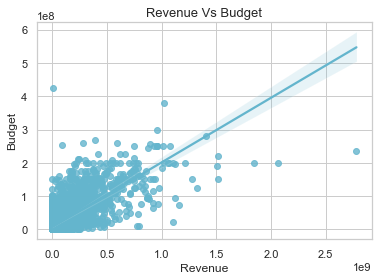

In [12]:
#relationship between budget and high earning.
#scatter plot.
ax = sns.regplot(x=tmdb_data['revenue'], y=tmdb_data['budget'],color='c')

#setup plot.
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)

#setup plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
data_corr = tmdb_data.corr()
#print
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

1. __Budget vs Revenue :__ Budget and revenue both have positive correlation(0.73) between them. With this there is a positive estimation that movies with high budgets get high revenue.

### Research Question 3  (Have movie earnings increased over the years?)

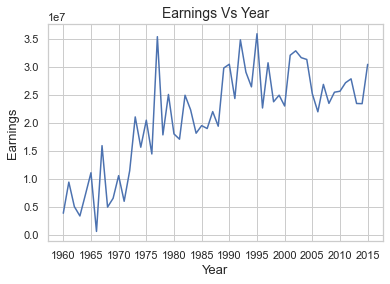

In [36]:
#show which year had most/least earns/profits
tmdb_data.groupby('release_year').mean()['movie_earning'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Earnings Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Earnings',fontsize = 13)
sns.set_style("whitegrid")

1. As indicated in the graph, movie earnings have been increasing over the years.

### Research Question 4  (Which movies have highest and lowest runtime?)

In [44]:
#we can use our already definined calculate function
calculate_high_low('runtime')

,3894,4883
popularity,0.006925,0.078472
budget,0,0
movie_earning,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
runtime,900.0,2.0
genres,Documentary,Animation
production_companies,NaN,NaN


1st Column Movie with id 3894(The story of film) has highest runtime.
\
2rd Column Movie with id 4883(Fresh Guacamole) has lowest runtime.

### Research Question 5  (Which genres have low and high movie release?)

In [7]:
#defining function
def data(column):
    #will take a column, and separate the string by '|'
    data = tmdb_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [8]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Drama       4761
Comedy      3793
Thriller    2908
Action      2385
Romance     1712
dtype: int64

Above is the number of total movie releases from each genre in descending order.

### Research Question 6 (Are movies with more polpularity getting high earns?)

Correlation Between Popularity And High Earning :  0.6289906698448983


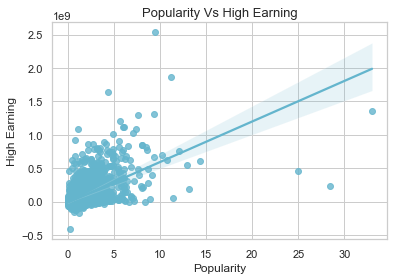

In [13]:
#scatterplot between popularity and earnings/profit

ax = sns.regplot(x=tmdb_data['popularity'],y=tmdb_data['movie_earning'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs High Earning",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("High Earning",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them.
print("Correlation Between Popularity And High Earning : ",data_corr.loc['popularity','movie_earning'])

1. __Popularity Vs Earning :__ Popularity and earning have positive correlation(0.62). Good estimation that high popularity can lead to high earning.

### Looking at characteristics of high earning movies

In [8]:
#movie earning with 50000000 and more
profit_data = tmdb_data[tmdb_data['movie_earning'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,id,imdb_id,movie_earning,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,135397,tt0369610,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,76341,tt1392190,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
3,262500,tt2908446,185238201,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### 1. Average budget high earning movies.

In [9]:
#defining function to find average 
def high_earning_avg(column):
    return profit_data[column].mean()

In [18]:
# calling the above function for budget
high_earning_avg('budget')

56675090.037841626

As indicated above, a high earning movie must have a plus minus 50million budget.

### 2. Average revenue high earning movies.

In [19]:
# calling the above function for revenue
high_earning_avg('revenue')

244880868.96706378

As indicated above, a high earning movie must get a plus minus 240million revenue.

### 3. Total release of movies by production company that got high earns.

In [11]:
#defining function
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [12]:
#variable to store the retured value
count = data('production_companies')
#printing top 5 values
count.head()

Universal Pictures                        171
Warner Bros.                              157
Paramount Pictures                        134
Twentieth Century Fox Film Corporation    126
Columbia Pictures                          98
dtype: int64

The total number of movies with highest earnings are mostly produced by the above companies. And the more movie releases a company hass the greater the chanses of high earing.

### 4. Average runtime high earning movies.

In [13]:
# calling the above function for revenue
high_earning_avg('runtime')

113.56762438682551

As indicated above, a high earning movie must have a plus minus 110 minutes runtime below is the graphical format.

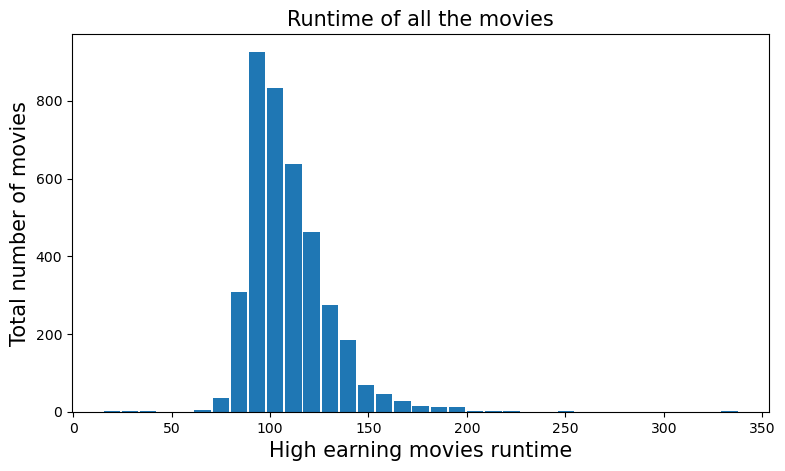

In [10]:
#histogram for high earning movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('High earning movies runtime', fontsize = 15)
#On y-axis 
plt.ylabel('Total number of movies', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

As seen from the above graph, It is positively skewed/right skewed. Most of the movies are timed between 90 to 125 minutes. 

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


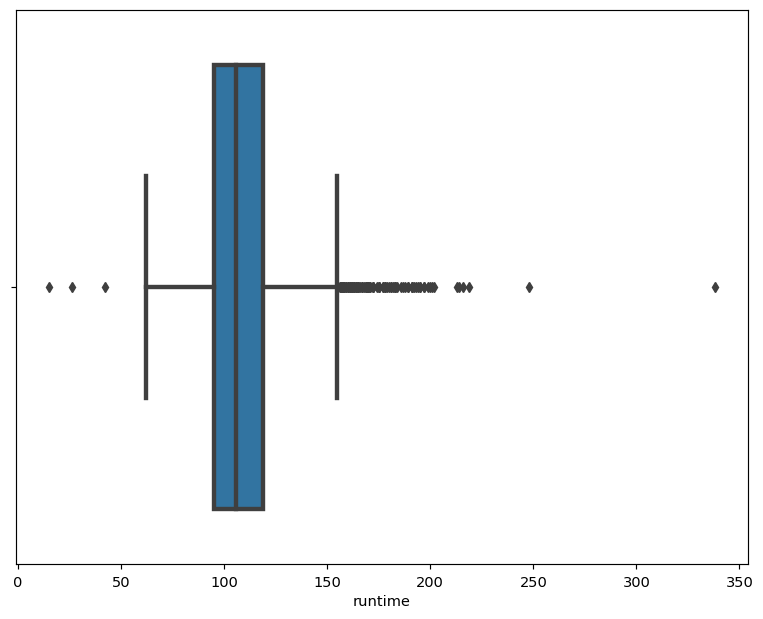

In [11]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(tmdb_data['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

From the above boxplot, We can get the overall spreaded distribution of runtime of the movies.
And with careful obeservations we can spot the outliers of the data set.

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


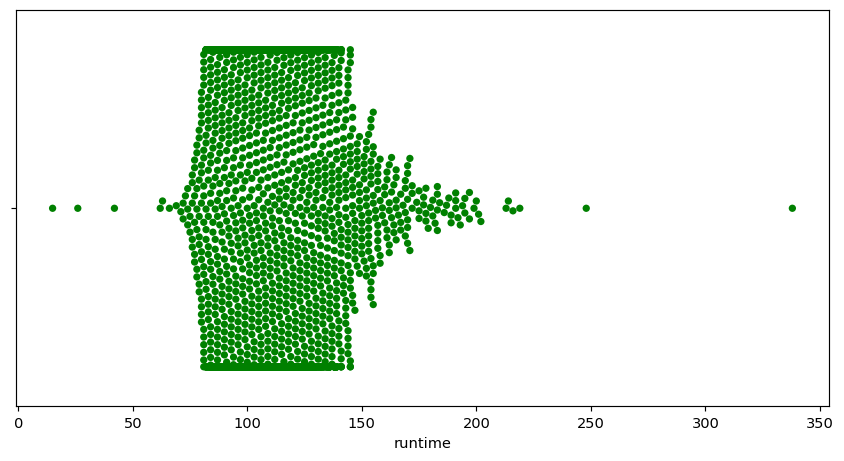

In [12]:
#The Second plots is the data points plot of runtime of movies

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(tmdb_data['runtime'], color = 'green')
#displaying the plot
plt.show()

The above plot generated gives a complete visual distribution of movie runtime by having the points placed respectivly to thier position in the distribution.

In [13]:
#getting specific runtime 
tmdb_data['runtime'].describe()

count    3855.000000
mean      109.215824
std        19.922166
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

With both graph, plot and calculations, we can conclude that..

25% of movies have a runtime of less than 95 minutes
50% of movies have a runtime of less than 106 minutes. (median)
75% of movies have a runtime of less than 119 minutes

And a high earning movie on average has a runtime of 110 minutes. 

### 5. Average genre in high earning movies.

In [14]:
#count movie per genre
count = data('genres')
#print
count.head()

Comedy       556
Drama        521
Action       482
Thriller     420
Adventure    392
dtype: int64

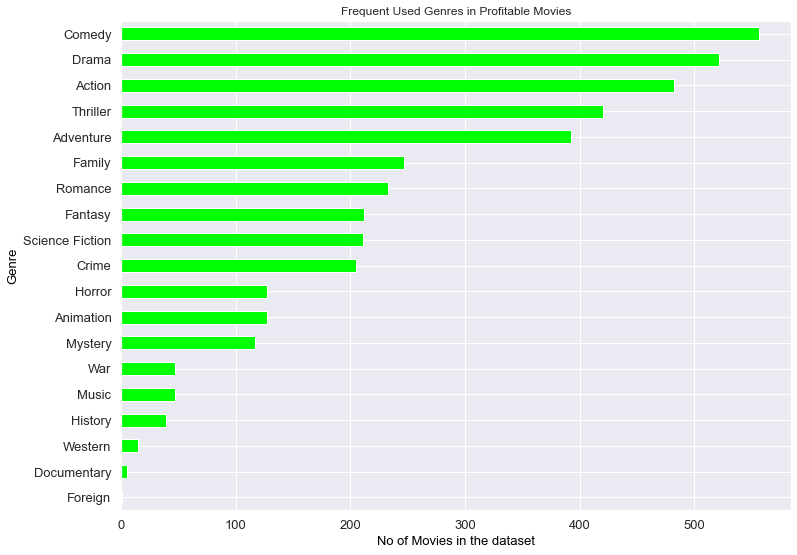

In [18]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on y and x axis
lt.set_ylabel('Genre', color = 'black', fontsize = '13')
lt.set_xlabel('No of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

In high earning movies, comedy is seen to be the most chosen genre.

### 6. Frequent cast in high earning movies.

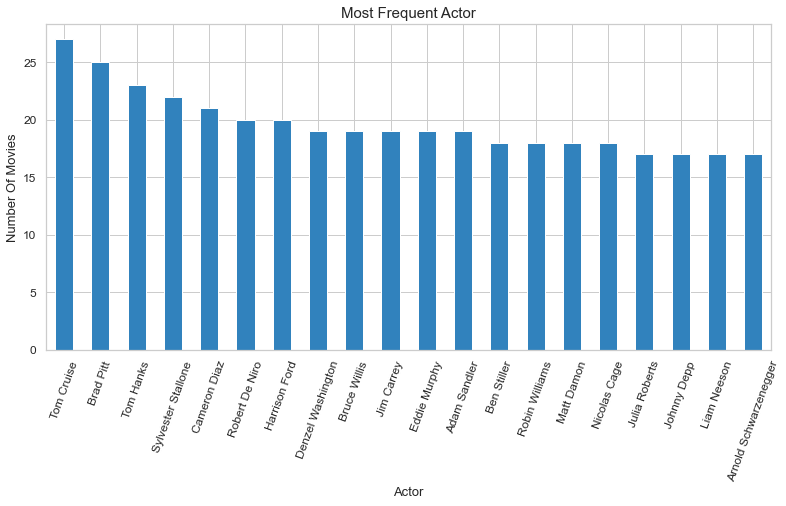

In [39]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = data('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

In high earning movies, people/cast like Tom Cruise to Cameron Diaz seem to be the most chosen in more than 20 films.

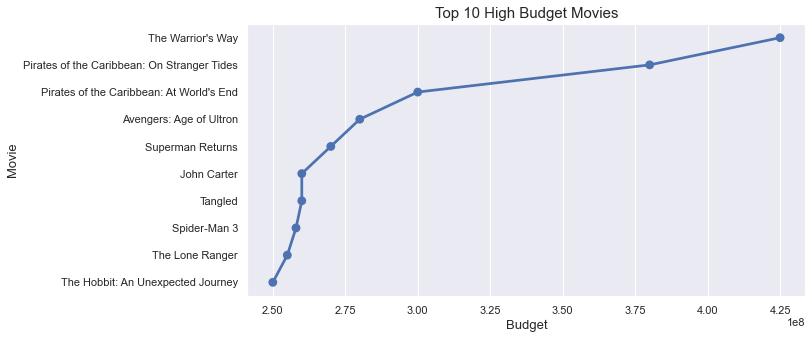

In [17]:
#Top10 high budget movies
#find top10 in budget column
info = pd.DataFrame(tmdb_data['budget'].sort_values(ascending = False))
info['original_title'] = tmdb_data['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_ylabel("Movie",fontsize = 13)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

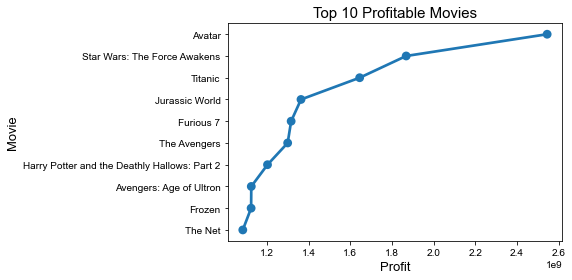

In [16]:
#Top10 high budget movies
info = pd.DataFrame(tmdb_data['movie_earning'].sort_values(ascending = False))
info['original_title'] = tmdb_data['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['movie_earning'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_ylabel("Movie",fontsize = 13)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

<a id='conclusions'></a>
## Conclusions

#### General movies

1. Avatar, StarWars and Titanic are the top most profitable movies.
2. Movies with high budgets get high revenue.
3. In the long run, movie earnings have been increasing over the years.
4. Drame, Comedy, Thriller and Action movies are the most released.
5. Estimation that high popularity can lead to high earning.

#### High earned movies

1. A high earning movie must have a plus minus 50million budget.
2. A high earning movie must get a plus minus 240million revenue.
3. High earning movie must have a plus minus 110 minutes runtime.
4. Comedy,drama,action,thriller seem to be the most chosen genre.
5. Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz are mostly found in hit movies.

## Limitations

1. After sampling the data to movies with 50million and more earnings/profit, This ment that our analysis is not a 100% gurantee solution and error free analysis but following this can give high expectation to a high earning movie. This analysis is one of many ways to reach those expectations, there are other ways too. Raws that had missing values were dropped which may affect the analysis. And wether the infomation was complete and uptodate.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

## references 
github repositories 

https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/.ipynb_checkpoints/investigate-a-dataset-template-checkpoint.ipynb

https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb